![alt text](statements/T9.png "T9")

In [115]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [116]:
n = 200
theta_1 = 5
theta_2 = 8

In [117]:
def getZ(n):
    Z = []
    Z.extend([1, 0] for _ in range(n))
    Z.extend([0, 1] for _ in range(2 * n))
    Z.extend([1, 1] for _ in range(n))
    return np.matrix(Z)

In [118]:
def getPred(X, Z):
    return (Z.T * Z) ** -1 @ Z.T @ X

In [119]:
Z = getZ(n)
Theta = np.matrix([[theta_1], [theta_2]])

In [120]:
X = Z @ Theta + np.matrix(np.random.normal(0, 1, 4 * n)).T

In [121]:
theta_pred = getPred(X, Z)

In [122]:
theta_pred

matrix([[4.97886558],
        [7.9550481 ]])

In [123]:
T = np.matrix([8, -5])

In [124]:
B = T @ (Z.T @ Z) ** -1 @ T.T
B

matrix([[0.322]])

In [125]:
F = ((((T @ theta_pred).T ) * (1/B) * ((T @ theta_pred))) * ((4 * n - 2))) / sum(np.array(X - Z @ theta_pred) ** 2)

In [126]:
sum(np.array(X - Z @ theta_pred) ** 2)

array([784.0007411])

In [127]:
print(X.shape)
print(Z.shape)
print((Z @ theta_pred).shape)

(800, 1)
(800, 2)
(800, 1)


In [128]:
F < stats.f.ppf(1 - 0.05, 1, 4 * n - 2)

matrix([[ True]])

In [129]:
F

matrix([[0.00980153]])

In [130]:
stats.f.ppf(1 - 0.05, 1, 4 * n - 2)

3.853138126495274

In [131]:
def F_test(X, Z, T):
    theta_pred = getPred(X, Z)
    B = T @ (Z.T @ Z) ** -1 @ T.T
    sum_sq = sum(np.array(X - Z @ theta_pred) ** 2)
    F = ((T @ theta_pred).T @ (1/B) @ T @ theta_pred * (4 * n - 2)) / sum_sq
    return np.sum(F < stats.f.ppf(1 - 0.05, 1, 4 * n - 2))

In [132]:
F_test(X, Z, T)

1

In [133]:
F_test(X, Z, np.matrix([8, -5]))

1

In [134]:
percentage1 = []
percentage2 = []
s1 = 0
s2 = 0
for n in range(1, 1000):
    Z = getZ(n)
    X = Z @ Theta + np.matrix(np.random.normal(0, 1, 4 * n)).T
    T1 = np.matrix([8, -5])
    T2 = np.matrix([3, -2])
    
    s1 += F_test(X, Z, T1)
    s2 += int(F_test(X, Z, T2))
    percentage1.append(s1 / n)
    percentage2.append(s2 / n)

In [135]:
percentage1[0:5]

[1.0, 1.0, 1.0, 1.0, 1.0]

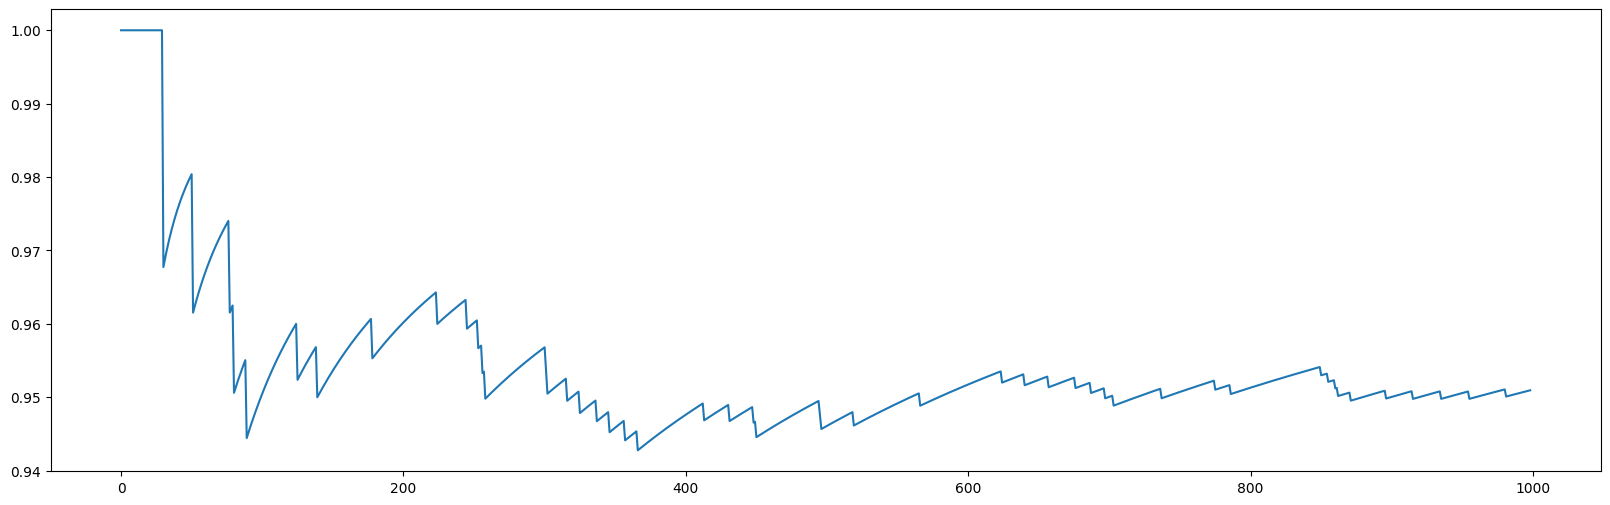

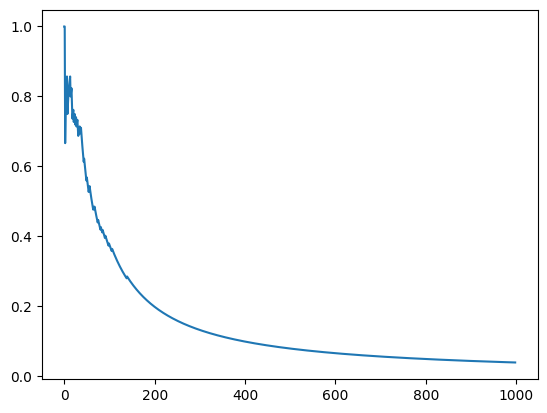

In [139]:
fig = plt.figure(figsize=[20, 6])
plt.plot(percentage1)
plt.show()
plt.plot(percentage2)

In [137]:
opt_vars = [[], []]
mean_vars = [[], []]
for k in range(1, 15):
    n = 2 ** k
    test_cnt = 100
    
    Z = getZ(n)
    
    opt_preds = [[], []]
    mean_preds = [[], []]
    
    for i in range(test_cnt):
        X = Z @ Theta + np.matrix(np.random.normal(0, 1, 4 * n)).T
        opt_preds[0].append(getPred(X, Z)[0])
        opt_preds[1].append(getPred(X, Z)[1])
        mean_preds[0].append(np.mean(X[0:n]))
        mean_preds[1].append(np.mean(X[n: 3 * n]))
    
    opt_vars[0].append(np.var(opt_preds[0]))
    opt_vars[1].append(np.var(opt_preds[1]))
    mean_vars[0].append(np.var(mean_preds[0]))
    mean_vars[1].append(np.var(mean_preds[1]))
opt_vars = np.array(opt_vars)
mean_vars = np.array(mean_vars)

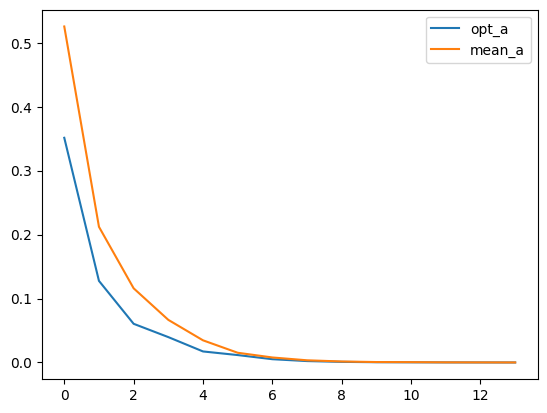

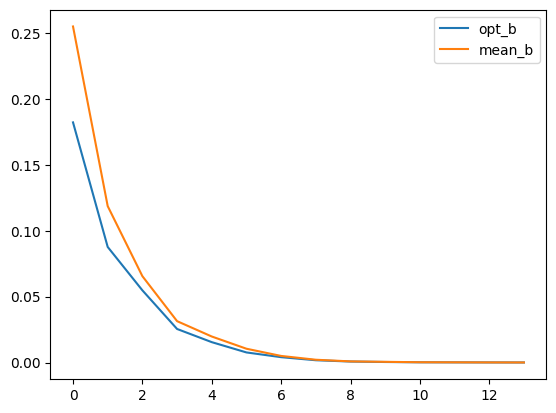

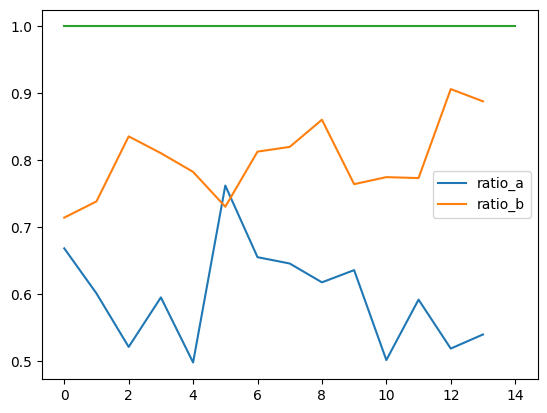

In [138]:
plt.plot(opt_vars[0], label="opt_a")
plt.plot(mean_vars[0], label="mean_a")
plt.legend()
plt.show()
plt.plot(opt_vars[1], label="opt_b")
plt.plot(mean_vars[1], label="mean_b")
plt.legend()
plt.show()
plt.plot(opt_vars[0] / mean_vars[0], label="ratio_a")
plt.plot(opt_vars[1] / mean_vars[1], label="ratio_b")
plt.plot([0, len(opt_vars[0])], [1, 1])
plt.legend()
plt.show()

In [140]:
opt_vars

array([[3.51384070e-01, 1.27630273e-01, 6.05069148e-02, 3.96938015e-02,
        1.72730116e-02, 1.16144491e-02, 5.14289586e-03, 2.21877336e-03,
        9.77439184e-04, 4.42307988e-04, 2.71701913e-04, 1.35263994e-04,
        7.40373577e-05, 2.69257148e-05],
       [1.82332794e-01, 8.77377275e-02, 5.48028337e-02, 2.54604001e-02,
        1.54588703e-02, 7.64570370e-03, 4.05405109e-03, 1.72345590e-03,
        7.29967514e-04, 3.87484720e-04, 1.55828337e-04, 1.05863116e-04,
        6.01205828e-05, 2.16675331e-05]])

In [141]:
mean_vars

array([[5.25452363e-01, 2.12208198e-01, 1.16004371e-01, 6.66527450e-02,
        3.46598696e-02, 1.52323991e-02, 7.84498910e-03, 3.43398013e-03,
        1.58159703e-03, 6.95190949e-04, 5.41290177e-04, 2.28403570e-04,
        1.42616450e-04, 4.98488924e-05],
       [2.55159171e-01, 1.18753827e-01, 6.55581464e-02, 3.14000959e-02,
        1.97451718e-02, 1.04608030e-02, 4.98547041e-03, 2.10125057e-03,
        8.48055696e-04, 5.06797108e-04, 2.01050304e-04, 1.36831208e-04,
        6.63205809e-05, 2.43929501e-05]])